In [1]:
import numpy as np

To do: 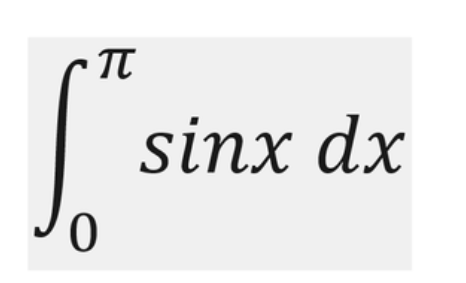

Soln:

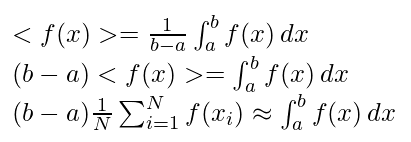

In [9]:
a = 0
b = np.pi
N = 1000

xi = np.random.uniform(low = a, high = b, size = N)

def f(x):
    return np.sin(x)
integ = (b-a) * (1/N) * np.sum(f(xi))
integ

2.0090815503405985

In [10]:
-(np.cos(np.pi)-np.cos(0))

2.0

$\int_{0}^{1} e^{e^{x}} \, dx$


In [12]:
a = 0
b = 1
N = 1000

xi = np.random.uniform(low = a, high = b, size = N)

def f(x):
    return np.exp(np.exp(x))
integ = (b-a) * (1/N) * np.sum(f(xi))
integ


6.178866736522287

To evalulate:
$
\int_{-\infty}^{\infty} g(x) \cdot \frac{1}{\sigma \sqrt{2\pi}} \cdot e^{-\frac{(x-\mu)^2}{2\sigma^2}} \, dx
$

For $\mu = 5, \sigma = 2 $

1) $ g(x) = x$, should give mean. \
2) $ g(x) = (x - \mu)^2$ should give variance 

The above integral is equivalent to:
$\frac{1}{N} \sum_{i=1}^{N} g(x_i)
$
where, $x_i$ ~ $N(x | \mu, \sigma^2)
 $


In [114]:
N = 10000
mu = 5
sigma = 2
xi = np.random.randn(N)*sigma + mu

#g(x) = x
mean = np.mean(xi)
#g(x) = (x-mu)^2
var = np.mean((xi-np.mean(xi))**2)
sd = np.sqrt(var)

In [26]:
mean, sd

(4.967031791619673, 2.009106152019871)

In [47]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

**Now I'm trying to do integral (Normal * log(Normal))**

In [49]:
dis = tfd.Normal(3,2)
dis

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [58]:
true_int = - dis.entropy()
true_int

<tf.Tensor: shape=(), dtype=float32, numpy=-2.1120858>

In [111]:
N = 1000
samp = np.random.randn(N) * 2 + 3

In [112]:
log_prob = dis.log_prob(samp)

In [113]:
mc_est = np.mean(log_prob)
mc_est

-2.0843468

**Gauss_quadrature**

In [116]:
from numpy.polynomial.hermite_e import hermegauss
from itertools import product

We choose a Hermite Polynomial, calculate it's roots (sigma points), weights associated with those sigma points and normalize them. Then we can find the integral by:

$ \sum_{i=1}^{n_s} W_i*g(\xi_i) $ \
$\xi_i$ are the sigma points (for Standard Normal Dist). Thus we need to scale by sd = 2 and shift by mean = 3


In [99]:
unit_sigma_points, hermite_weights = hermegauss(2)
unit_sigma_points, hermite_weights

(array([-1.,  1.]), array([1.25331414, 1.25331414]))

In [100]:
hermite_weights /= np.sum(hermite_weights)

In [101]:
hermite_weights

array([0.5, 0.5])

In [102]:
s = unit_sigma_points*2 + 3

In [103]:
lp = dis.log_prob(s)

In [104]:
gk = np.dot(lp, hermite_weights)
gk

-2.1120858192443848

**Extending to MultiDimentions**

In [124]:
mu = [1. , 0, 2.]
scale = np.eye(3)
L = np.linalg.cholesky(scale)

In [125]:
mvn = tfd.MultivariateNormalTriL(loc = mu, scale_tril = L)

True Integral:

In [142]:
entropy = mvn.entropy()
integ = -entropy
integ

<tf.Tensor: shape=(), dtype=float64, numpy=-4.2568155996140185>

In [129]:
#p is pth Hermite Poly. n is order of Multivariate Normal Dist
p = 5
n = 3

unit_sigma_points, hermite_weights = hermegauss(p)
hermite_weights /= np.sum(hermite_weights)

unit_sigma_points = np.array(list(product(*(unit_sigma_points for _ in range(n))))).T  # Cartesian product
hermite_weights = np.array(list(product(*(hermite_weights for _ in range(n))))).prod(axis=1)

In [130]:
unit_sigma_points.shape

(3, 125)

In [151]:
lp = []
scaled = np.dot(unit_sigma_points.T, scale) + mu
for i in range(len(hermite_weights)):
    lp.append(mvn.log_prob(scaled[i,:]))

In [152]:
gh_int = np.dot(hermite_weights, lp)
gh_int

-4.2568155996140185

Matches. Similar ideas. Note: DONT FORGET SCALING 

**Doing MC Estimates**

In [170]:
N = 1000
samp = mvn.sample(N)

In [171]:
mc_int = np.mean(mvn.log_prob(samp))
mc_int

-4.247239976891447